In [1]:
import openslide
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage.io as skio

In [2]:
wsi_dir = '/DataMount/xl260/test/wsi1211'
wsi_name = os.listdir(wsi_dir)

In [3]:
# read wsi using openslide
wsi_path = os.path.join(wsi_dir, wsi_name[0])
wsi = openslide.OpenSlide(wsi_path)
# get the size of the wsi
wsi_size = wsi.dimensions
print(wsi_size)
# get the levels of the wsi
wsi_levels = wsi.level_count
print(wsi_levels)
# get the downsample of the wsi
wsi_downsample = wsi.level_downsamples
print(wsi_downsample)
# get the size of the wsi at each level
wsi_level_size = wsi.level_dimensions
print(wsi_level_size)
# get thumbnail of the wsi
thumbnail = wsi.get_thumbnail((wsi_size[0]//100, wsi_size[1]//100))

(48159, 51339)
3
(1.0, 4.000241472111384, 16.0042069862731)
((48159, 51339), (12039, 12834), (3009, 3208))


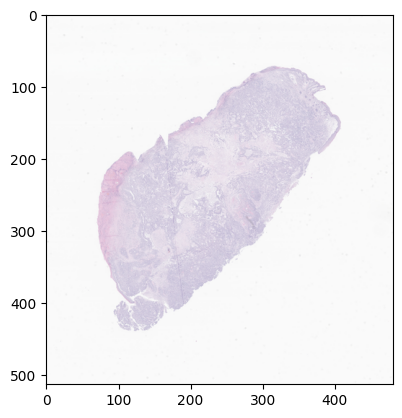

In [4]:
import matplotlib.pyplot as plt
plt.imshow(thumbnail)
plt.show()

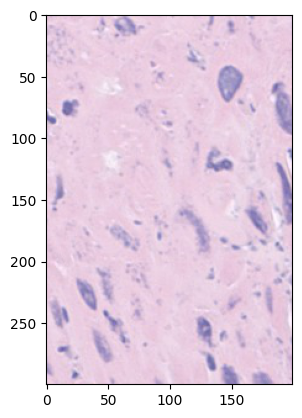

In [8]:
region = wsi.read_region((7800, 29700), 0, (200, 300))
plt.imshow(region)
region.save('./region_1.png')
#skio.imsave('region_1.png', region)

In [9]:
# get the region of the wsi
region = wsi.read_region((7800, 29700), 1, (50, 75))

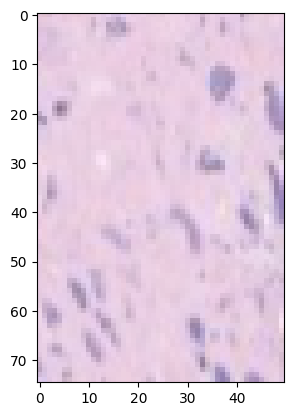

In [10]:
plt.imshow(region)
region.save('./region_4.png')

In [2]:
import os
os.listdir('/DataMount/xl260/Megan_Scanner/Out_1')

['json',
 '29ead210-6794-9983-d634-e85e374390fa_153648.json',
 '452a009b-b3d6-5d43-53d9-40bd1ca214c4_153250.json',
 '9d7cf7d5-8230-dfc0-3851-b53821231949_153409.json',
 '9e065b50-fbc3-02be-c141-73e2475bda11_153811.json',
 'a2d0ce4f-9dad-d581-9a20-cc51d43924aa_153530.json']

In [6]:
def get_mask(data, wsi_level_size):
    mask = np.zeros((wsi_level_size[0][1],wsi_level_size[0][0]), dtype=np.uint8)
    # Loop through the nuclei
    for ind, inst in data['nuc'].items():
        contour = np.array(inst['contour'])
        # Extract x and y coordinates from the contour
        x = contour[:, 0]
        y = contour[:, 1]
        # Get the polygon coordinates
        rr, cc = polygon(y, x, mask.shape)
        # get type
        nuclei_type = inst['type']
        if nuclei_type == 2:
            mask[rr, cc] = 255
        else:
            mask[rr, cc] = 128
    return mask

In [4]:
os.listdir('/DataMount/xl260/Megan_Scanner/Out_2/')

['json',
 '1015619.json',
 '1015620.json',
 '1015621.json',
 '1015622.json',
 '1015623.json']

In [5]:
os.mkdir('/DataMount/xl260/Megan_Scanner/Output/nuclei2')

In [6]:
os.listdir('/DataMount/xl260/Megan_Scanner/')

['Output', 'Output1', 'test', 'Output2', 'WSI_1', 'WSI_2', 'Out_1', 'Out_2']

In [8]:
ims = os.listdir('/DataMount/xl260/Megan_Scanner/Output/nuclei2')
ims

['9d7cf7d5-8230-dfc0-3851-b53821231949_153409.png',
 '9e065b50-fbc3-02be-c141-73e2475bda11_153811.png',
 '29ead210-6794-9983-d634-e85e374390fa_153648.png',
 '452a009b-b3d6-5d43-53d9-40bd1ca214c4_153250.png',
 'a2d0ce4f-9dad-d581-9a20-cc51d43924aa_153530.png',
 '1015619.png',
 '1015620.png',
 '1015621.png',
 '1015622.png',
 '1015623.png']

In [ ]:
from PIL import Image
import os
ims = os.listdir('/DataMount/xl260/Megan_Scanner/Output/nuclei2')
Image.MAX_IMAGE_PIXELS = None
for im in ims[5:]:
    img = skio.imread(os.path.join('/DataMount/xl260/Megan_Scanner/Output/nuclei2', im), plugin='pil')
    plt.imshow(img)
    plt.show()

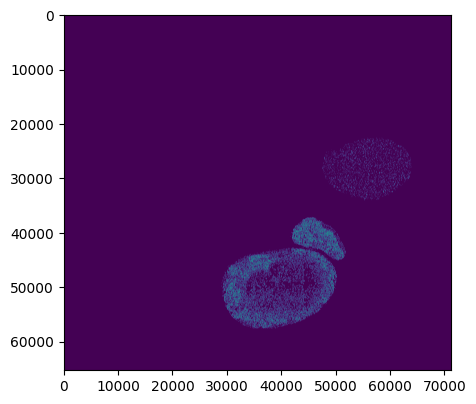

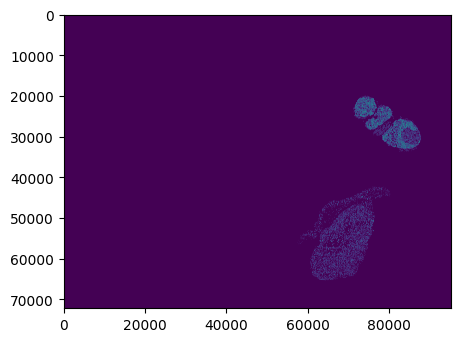

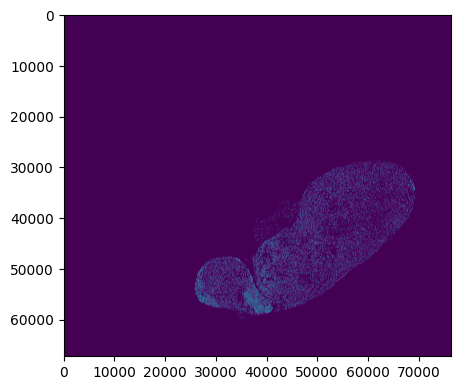

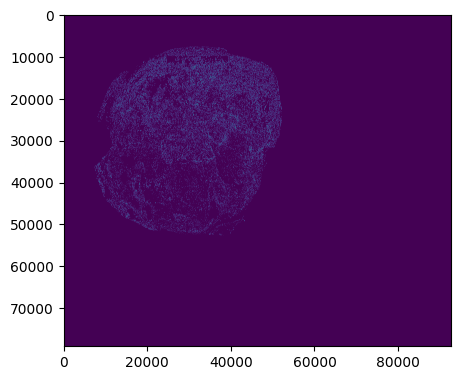

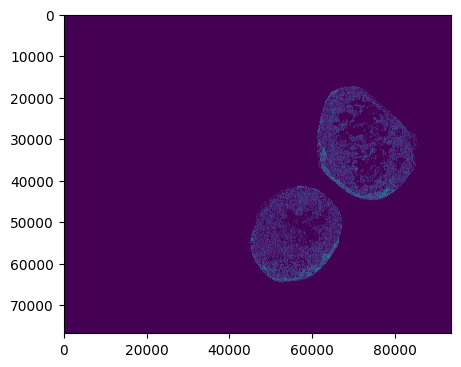

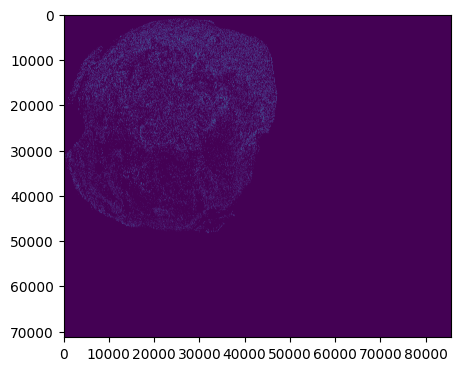

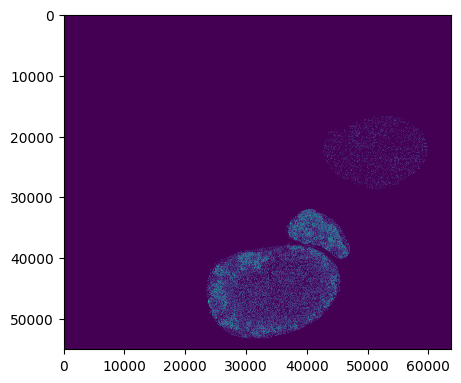

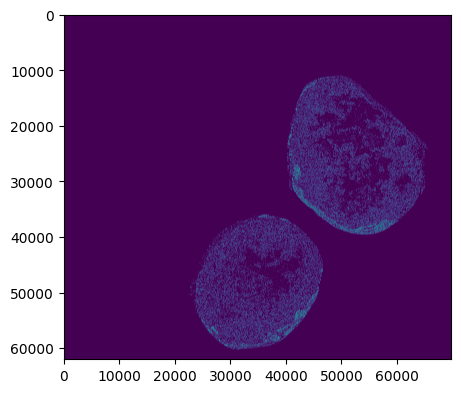

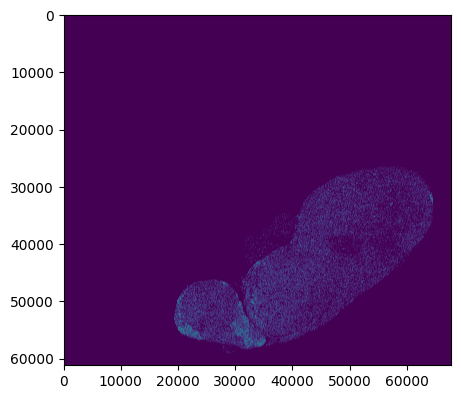

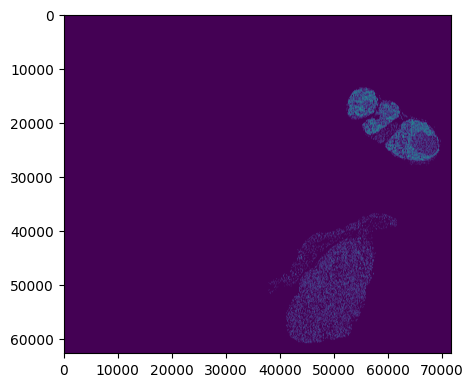

In [9]:
from PIL import Image
import os
ims = os.listdir('/DataMount/xl260/Megan_Scanner/Output/nuclei2')
Image.MAX_IMAGE_PIXELS = None
for im in ims:
    img = skio.imread(os.path.join('/DataMount/xl260/Megan_Scanner/Output/nuclei2', im), plugin='pil')
    # figure size
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.show()


In [7]:
# read json file
import json
import openslide
from skimage.draw import polygon


json_files = os.listdir('/DataMount/xl260/Megan_Scanner/WSI_2/')

for filei in json_files:
    filei = filei.split('.')[0]
    print(filei) 
    wsi_path = '/DataMount/xl260/Megan_Scanner/WSI_2/{}.svs'.format(filei)
    wsi = openslide.OpenSlide(wsi_path)
    wsi_level_size = wsi.level_dimensions
    print(wsi_level_size)

    json_path = '/DataMount/xl260/Megan_Scanner/Out_2/{}.json'.format(filei)
    with open(json_path, 'r') as f:
        data = json.load(f)
        # get keys of the json file
        keys = data.keys()

    mask1 = get_mask(data, wsi_level_size)
    #plt.imshow(mask1)


    # save the mask
    mask_path = '/DataMount/xl260/Megan_Scanner/Output/nuclei2/{}.png'.format(filei)
    skio.imsave(mask_path, mask1)
        


1015619
((85655, 71242), (21413, 17810), (5353, 4452), (2676, 2226))
1015620
((63743, 54997), (15935, 13749), (3983, 3437), (1991, 1718))
1015621
((69720, 61996), (17430, 15499), (4357, 3874), (2178, 1937))
1015622
((67727, 61182), (16931, 15295), (4232, 3823), (2116, 1911))
1015623
((71712, 62637), (17928, 15659), (4482, 3914), (2241, 1957))


In [3]:
# read json file
import json
import openslide
from skimage.draw import polygon


In [6]:
os.listdir('/DataMount/xl260/Megan_Scanner/test/output/')

['json', '9d7cf7d5-8230-dfc0-3851-b53821231949_153409.json']

((76388, 67243), (19097, 16810), (4774, 4202), (1193, 1050))
dict_keys(['mag', 'nuc'])
mask1 done
dict_keys(['mag', 'nuc'])
mask2 done


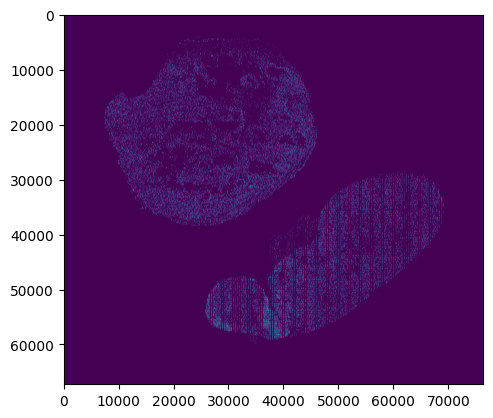

In [52]:
# read json file
import json
filei = '9d7cf7d5-8230-dfc0-3851-b53821231949_153409'
wsi_path = '/DataMount/xl260/Megan_Scanner/WSI/{}.svs'.format(filei)
wsi = openslide.OpenSlide(wsi_path)
wsi_level_size = wsi.level_dimensions
print(wsi_level_size)

json_path = '/DataMount/xl260/Megan_Scanner/Output/json/{}.json'.format(filei)
with open(json_path, 'r') as f:
    data = json.load(f)
    # get keys of the json file
    keys = data.keys()
    print(keys)

mask1 = get_mask(data, wsi_level_size)

print("mask1 done")

json_path = '/DataMount/xl260/Megan_Scanner/Output1/json1/{}.json'.format(filei)
with open(json_path, 'r') as f:
    data = json.load(f)
    # get keys of the json file
    keys = data.keys()
    print(keys)

mask2 = get_mask(data, wsi_level_size)
print("mask2 done")

mask = mask1 + mask2

plt.imshow(mask)

    


In [9]:
os.mkdir('/DataMount/xl260/Megan_Scanner/Output2/')

In [10]:
os.mkdir('/DataMount/xl260/Megan_Scanner/Output2/mask2')
os.mkdir('/DataMount/xl260/Megan_Scanner/Output2/json2')

In [14]:
os.listdir('/DataMount/xl260/Megan_Scanner/Output/mask')

['1015619.png',
 '1015620.png',
 '1015621.png',
 '1015622.png',
 '1015623.png',
 '29ead210-6794-9983-d634-e85e374390fa_153648.png',
 '452a009b-b3d6-5d43-53d9-40bd1ca214c4_153250.png',
 '9d7cf7d5-8230-dfc0-3851-b53821231949_153409.png',
 '9e065b50-fbc3-02be-c141-73e2475bda11_153811.png',
 'a2d0ce4f-9dad-d581-9a20-cc51d43924aa_153530.png']

In [15]:
mask_files

['1015619.png',
 '1015620.png',
 '1015621.png',
 '1015622.png',
 '1015623.png',
 '29ead210-6794-9983-d634-e85e374390fa_153648.png',
 '452a009b-b3d6-5d43-53d9-40bd1ca214c4_153250.png',
 '9d7cf7d5-8230-dfc0-3851-b53821231949_153409.png',
 '9e065b50-fbc3-02be-c141-73e2475bda11_153811.png',
 'a2d0ce4f-9dad-d581-9a20-cc51d43924aa_153530.png']

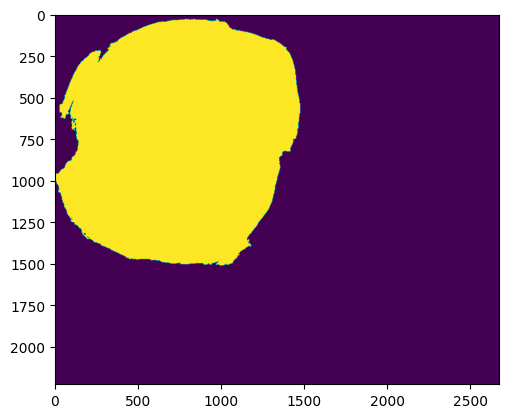

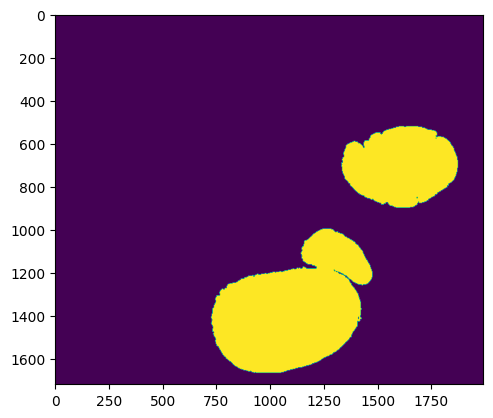

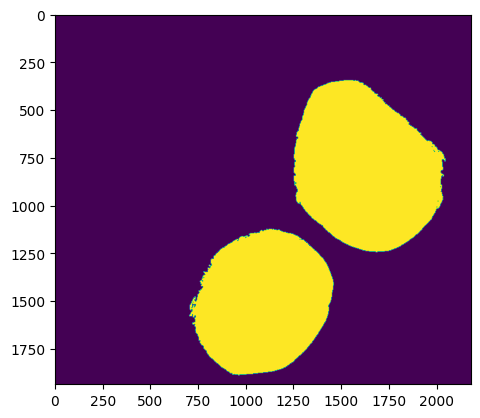

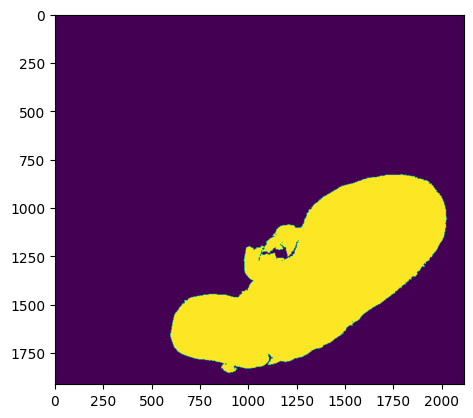

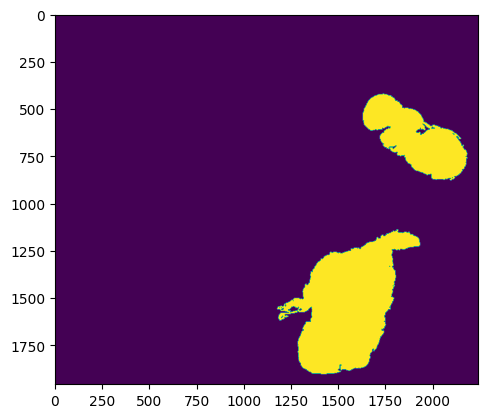

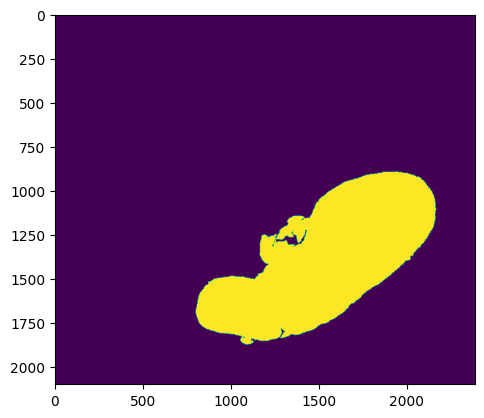

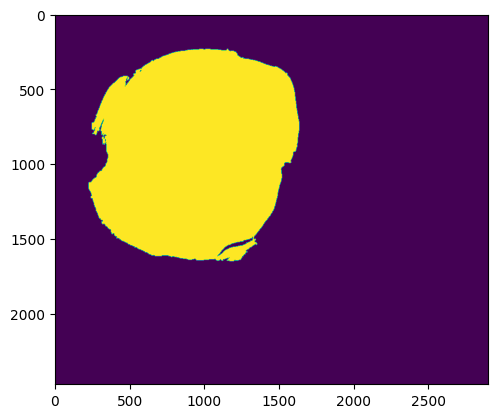

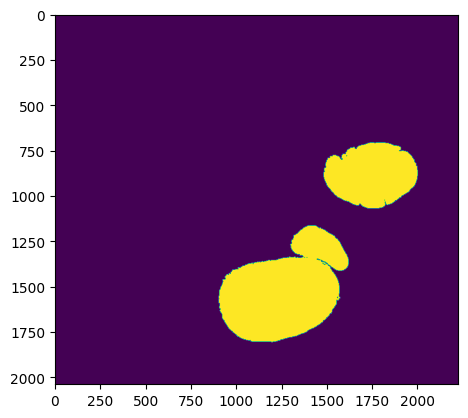

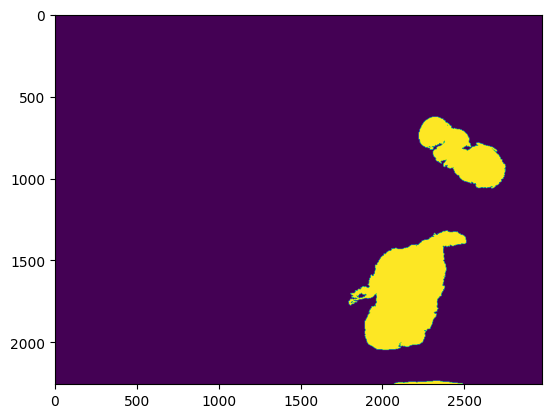

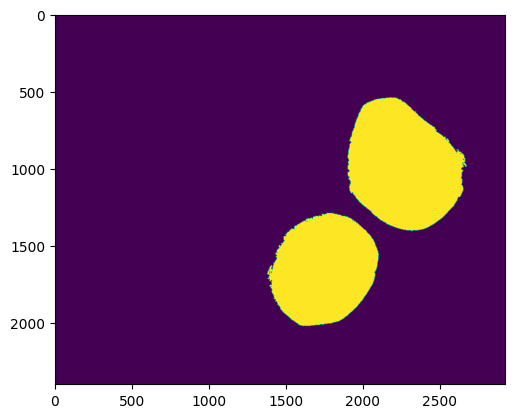

In [18]:
mask_files = os.listdir('/DataMount/xl260/Megan_Scanner/Output/mask/')
for filei in mask_files[:]:
    msk1 = skio.imread('/DataMount/xl260/Megan_Scanner/Output/mask/{}'.format(filei))
    msk2 = skio.imread('/DataMount/xl260/Megan_Scanner/Output2/mask2/{}'.format(filei))
    msk = msk2 - msk1
    plt.imshow(msk)
    plt.show()
    # Convert the image to uint8 before saving
    msk_uint8 = msk.astype(np.uint8)
    skio.imsave('/DataMount/xl260/Megan_Scanner/Output2/mask2/{}'.format(filei), msk_uint8)

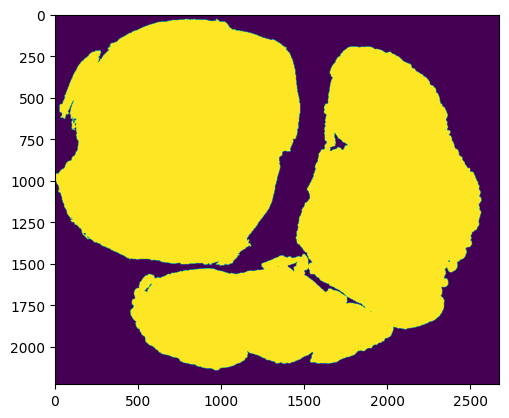

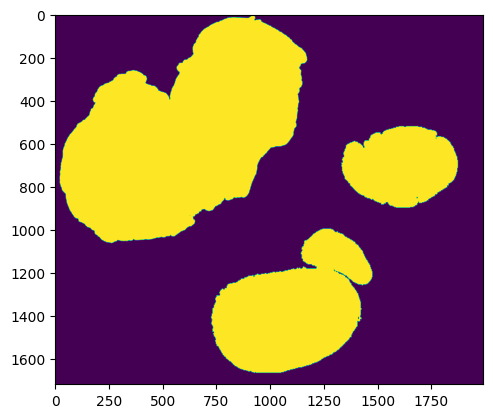

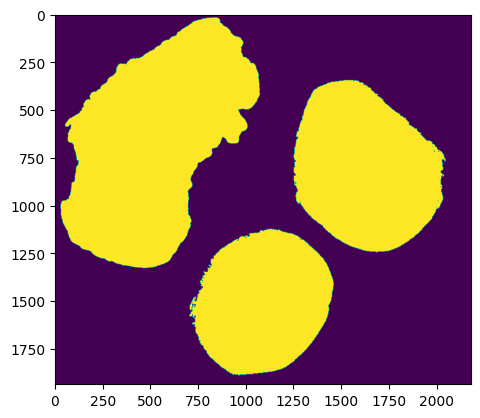

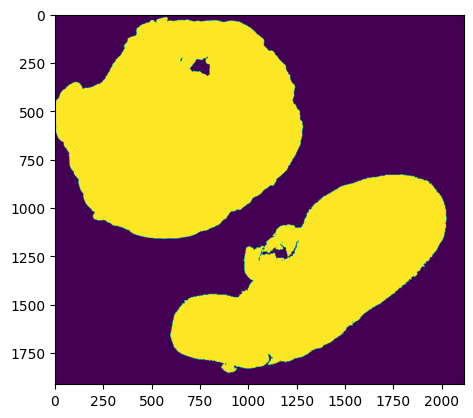

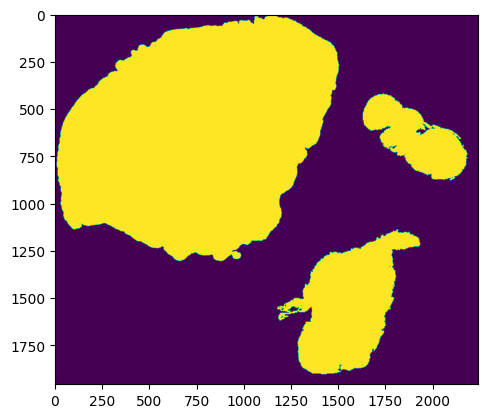

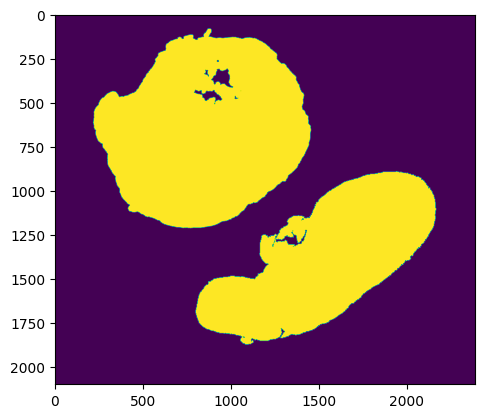

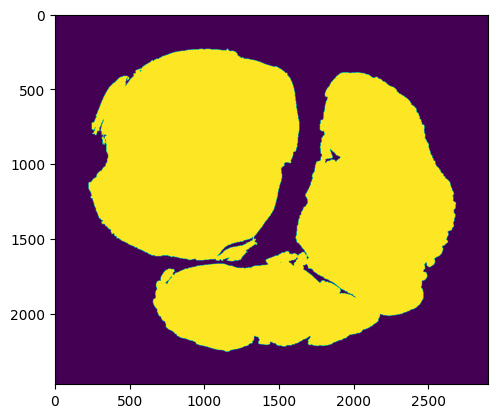

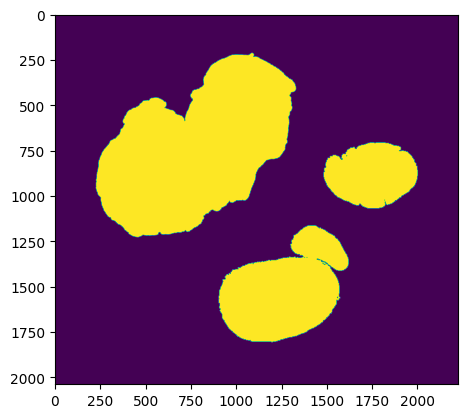

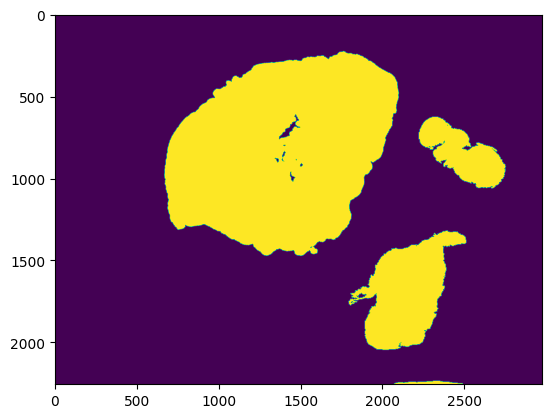

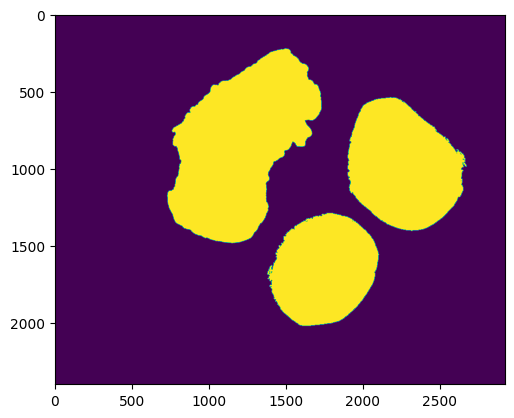

In [16]:
from skimage.transform import resize

mask_files = os.listdir('/DataMount/xl260/Megan_Scanner/Output/mask/')
for filei in mask_files:
    msk1 = skio.imread('/DataMount/xl260/Megan_Scanner/Output/mask/{}'.format(filei))
    msk2 = skio.imread('/DataMount/xl260/Megan_Scanner/Output1/mask1/{}'.format(filei))
    # resize msk2 to the same size as msk1
    msk2 = resize(msk2, msk1.shape)
    msk2[msk2>0] = 255
    msk = msk1 + msk2
    plt.imshow(msk)
    plt.show()
    # Convert the image to uint8 before saving
    msk_uint8 = msk.astype(np.uint8)
    skio.imsave('/DataMount/xl260/Megan_Scanner/Output2/mask2/{}'.format(filei), msk_uint8)

In [50]:
# Convert the image to uint8 before saving
msk_uint8 = msk.astype(np.uint8)
skio.imsave('/DataMount/xl260/Megan_Scanner/test/mask/9d7cf7d5-8230-dfc0-3851-b53821231949_153409.png', msk_uint8)

In [4]:
from skimage.draw import polygon

In [49]:
import skimage.io as skio

In [50]:
# save the mask
mask_path = './mask_700976.png'
skio.imsave(mask_path, mask)

In [1]:
from stardist.models import StarDist2D

2024-12-12 19:25:27.675166: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
from csbdeep.utils import Path, normalize
# impoirt resize from skimage
from skimage.transform import resize


In [9]:
import skimage.io as skio
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
Image.MAX_IMAGE_PIXELS = None
mask_path = './mask_700976.png'
mask = skio.imread(mask_path, plugin='pil')

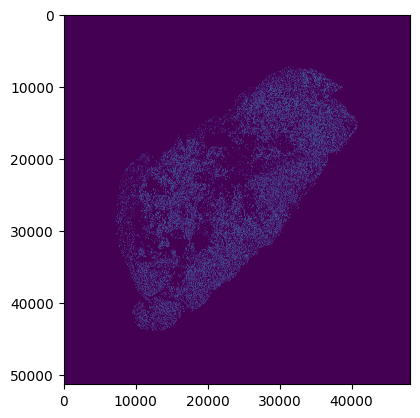

In [10]:
plt.imshow(mask)

In [12]:
region1 = skio.imread('./region_1.png')
region1.shape

(300, 200, 4)

In [14]:
model = StarDist2D.from_pretrained('2D_versatile_he')

Found model '2D_versatile_he' for 'StarDist2D'.


2024-12-12 19:30:14.445452: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-12-12 19:30:14.447215: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-12-12 19:30:14.504560: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: NVIDIA RTX A6000 computeCapability: 8.6
coreClock: 1.8GHz coreCount: 84 deviceMemorySize: 47.54GiB deviceMemoryBandwidth: 715.34GiB/s
2024-12-12 19:30:14.504863: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:e1:00.0 name: NVIDIA RTX A6000 computeCapability: 8.6
coreClock: 1.8GHz coreCount: 84 deviceMemorySize: 47.54GiB deviceMemoryBandwidth: 715.34GiB/s
2024-12-12 19:30:14.504895: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2024-12-12 19:3

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [ ]:
img = region1[:,:,:3]
axis_norm = (0,1,2)
img = normalize(img, 1,99.8, axis=axis_norm)

output = model.predict(img)

io = resize(output[0], (output[0].shape[0]*2, output[0].shape[1]*2), anti_aliasing=True)
io = io*255

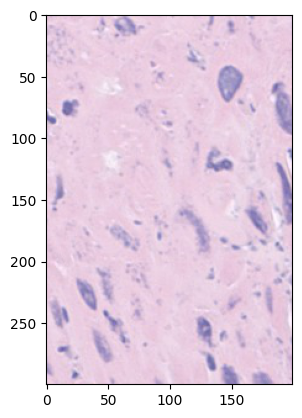

In [24]:
plt.imshow(region1)

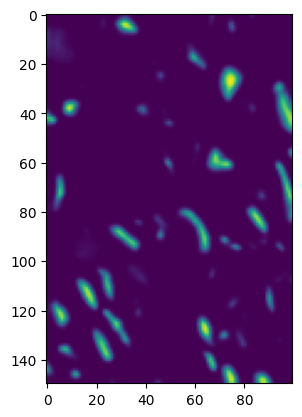

In [22]:
plt.imshow(output[0])

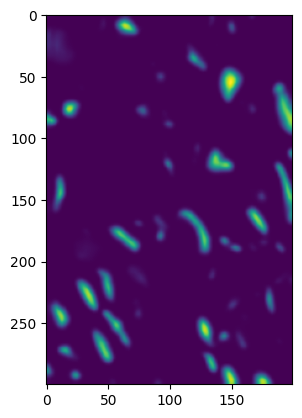

In [19]:
plt.imshow(io)

In [16]:
from skimage import measure
import numpy as np

In [17]:
iol = measure.label(io>50)
rps = measure.regionprops(iol)

id_ecc = np.where(np.asarray([r.eccentricity for r in rps])<.95)[0]+1
id_area = np.where((np.asarray([r.area for r in rps])>30) )[0]+1
mask1 = np.isin(iol,id_ecc)
mask2 = np.isin(iol,id_area)

mega = mask1 & mask2

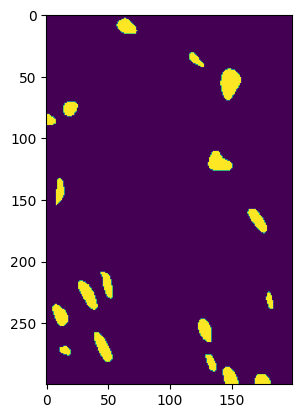

In [18]:
plt.imshow(mega)